<a href="https://colab.research.google.com/github/shiva7579/Machine_learning/blob/main/2nd_hand_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.callbacks import EarlyStopping
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization ,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**DATA** **PREPARATION** 


In [ ]:
data=pd.read_csv("train.csv")

In [ ]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


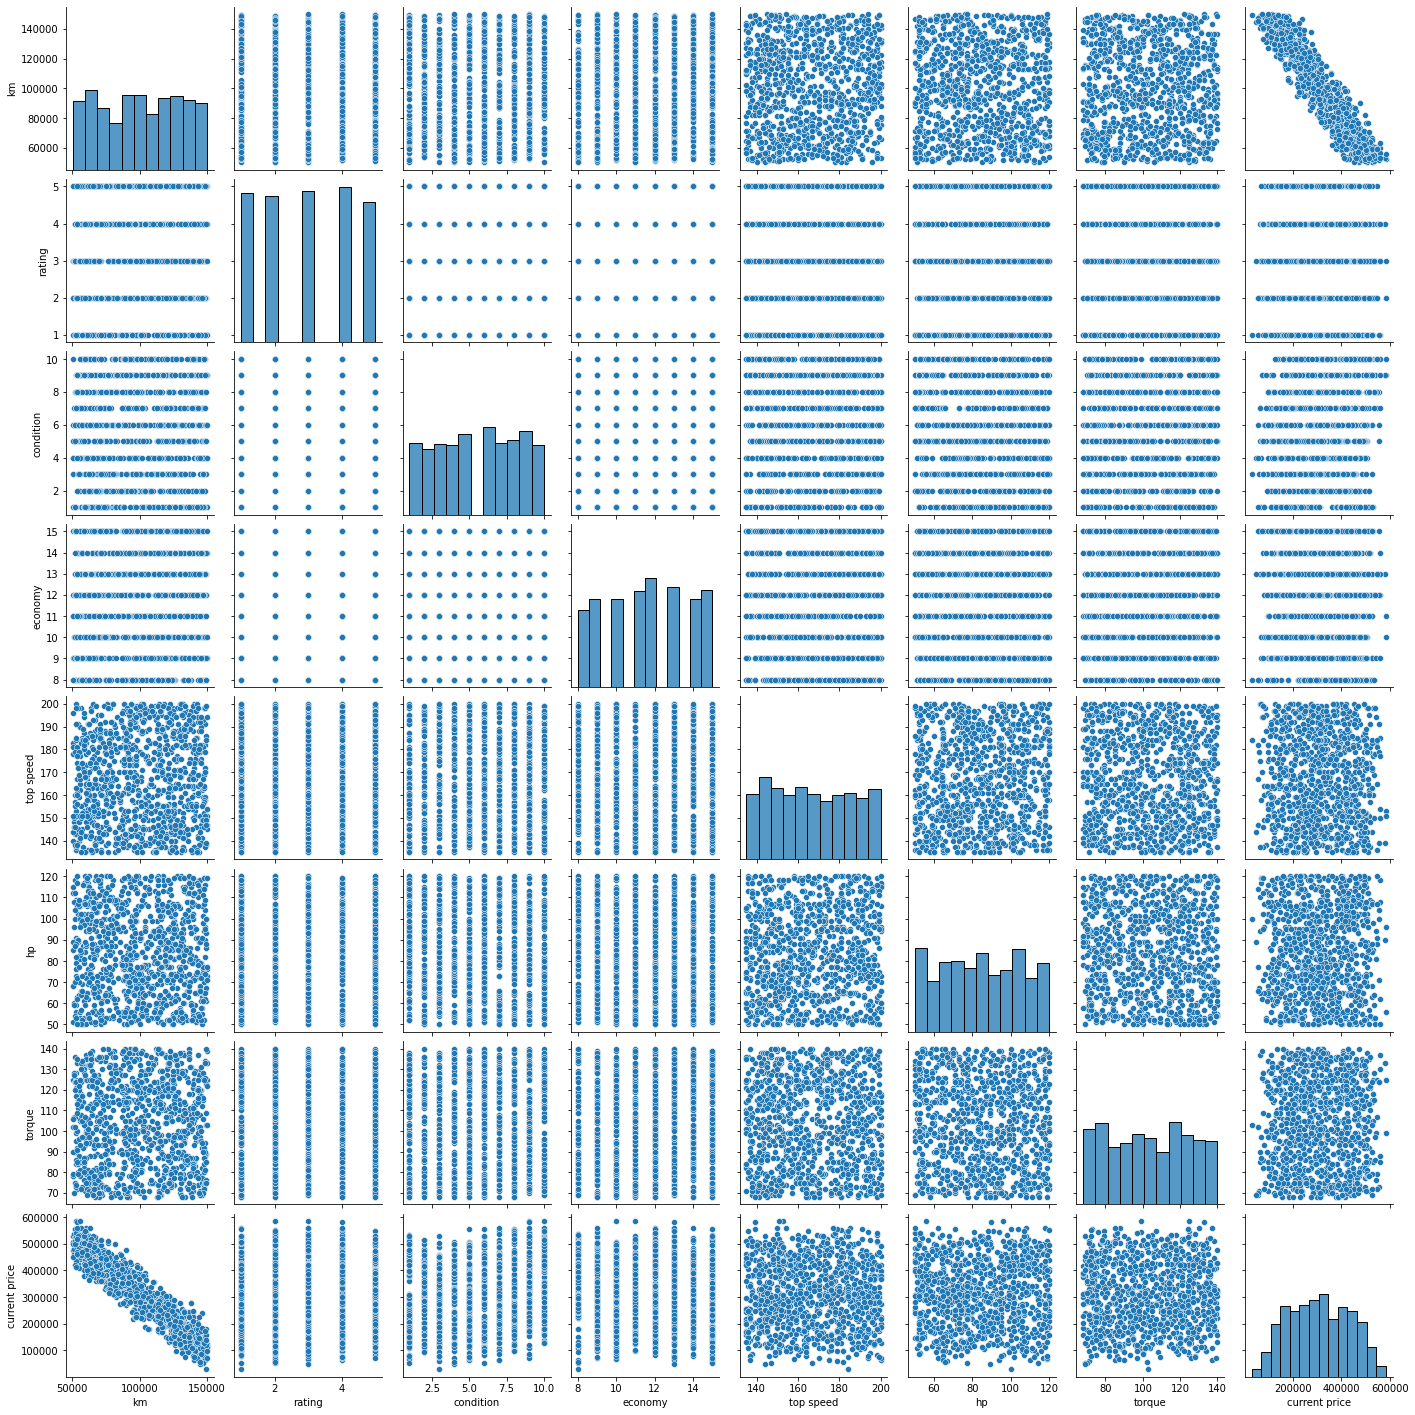

In [ ]:
sns.pairplot(data[['km','rating','condition','economy','top speed','hp','torque','current price']])

In [ ]:
tensor_data = tf.constant(data)
tf.cast(tensor_data,tf.float32)

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
tensor_data=tf.random.shuffle(tensor_data)

In [ ]:
print(tensor_data[:5,:])

tf.Tensor(
[[5.070000e+02 6.872370e+05 8.431430e+05 6.000000e+00 1.256380e+05
  1.000000e+00 9.000000e+00 1.500000e+01 1.430000e+02 1.010000e+02
  9.400000e+01 2.885565e+05]
 [9.070000e+02 6.963150e+05 7.965300e+05 2.000000e+00 1.244750e+05
  2.000000e+00 8.000000e+00 1.300000e+01 1.870000e+02 9.800000e+01
  1.210000e+02 2.651940e+05]
 [3.850000e+02 5.724460e+05 8.700380e+05 3.000000e+00 1.322740e+05
  4.000000e+00 7.000000e+00 1.400000e+01 1.470000e+02 5.400000e+01
  1.000000e+02 2.011885e+05]
 [1.840000e+02 5.576740e+05 8.250630e+05 6.000000e+00 1.273220e+05
  1.000000e+00 2.000000e+00 1.500000e+01 1.980000e+02 6.300000e+01
  1.360000e+02 1.785200e+05]
 [9.780000e+02 5.883920e+05 8.317740e+05 7.000000e+00 6.110100e+04
  4.000000e+00 4.000000e+00 1.400000e+01 1.580000e+02 1.190000e+02
  1.110000e+02 4.585915e+05]], shape=(5, 12), dtype=float64)


In [ ]:
x=tensor_data[:,3:-1]
y=tensor_data[:,-1]
y=tf.expand_dims(y,axis=-1)
print(x.shape,y.shape)

(1000, 8) (1000, 1)


In [ ]:
Train_ratio=0.8
val_ratio=0.1
Test_ration=0.1
Dataset_size=len(x)


In [ ]:
x_train=x[:int(Dataset_size*Train_ratio)]
y_train=y[:int(Dataset_size*Train_ratio)]
x_val=x[int(Dataset_size*Train_ratio):int(Dataset_size*(Train_ratio+val_ratio))]
y_val=y[int(Dataset_size*Train_ratio):int(Dataset_size*(Train_ratio+val_ratio))] 
x_test=x[int(Dataset_size*(Train_ratio+val_ratio)):]
y_test=y[int(Dataset_size*(Train_ratio+val_ratio)):]                                       

In [ ]:
normalizer=Normalization()
normalizer.adapt(x_test)
normalizer(x_test)


<tf.Tensor: shape=(100, 8), dtype=float32, numpy=
array([[-0.8475867 ,  1.0125675 ,  1.2550157 ,  0.29748282, -1.2865139 ,
        -0.18292706,  1.1182377 ,  1.2267194 ],
       [-0.8475867 , -1.2511824 , -0.15511434, -1.9060925 , -0.8351053 ,
         0.08373103,  0.9718077 ,  1.1790984 ],
       [ 0.91821945, -0.8960083 ,  1.2550157 ,  1.0320079 ,  0.51912063,
        -0.8229065 ,  0.48370767,  1.0362351 ],
       [-1.4361887 ,  0.04519214, -1.5652444 , -1.1715674 , -1.7379225 ,
        -0.60958004,  0.48370767, -0.7733658 ],
       [-0.25898466,  0.7457293 , -0.86017936, -0.06977973,  0.97052926,
        -0.39625353,  1.7527677 , -0.86860794],
       [-1.4361887 , -1.453114  , -0.86017936,  0.6647454 ,  0.51912063,
         0.61704725,  1.8503877 , -1.5829241 ],
       [ 0.91821945, -1.0051011 ,  1.2550157 ,  1.3992705 ,  0.06771199,
        -0.8762381 , -0.7365424 , -1.2971977 ],
       [-0.25898466,  0.06419186,  1.2550157 , -1.5388299 ,  0.97052926,
         0.67037886, -0.834162

In [ ]:
model=tf.keras.Sequential([InputLayer(input_shape=(8,)),
                          normalizer,
                          Dense(128,activation="relu"),
                           Dense(128,activation="relu"),
                           Dense(128,activation="relu"),
                           Dense(1)])

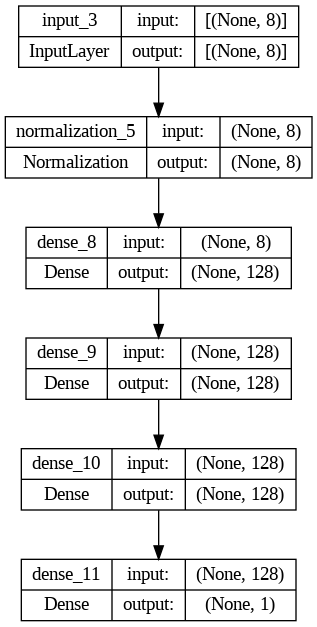

In [ ]:
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True)

In [ ]:
model.compile(loss=MeanAbsoluteError(),optimizer=Adam(learning_rate=0.001),metrics=["Accuracy"])

In [ ]:
history=model.fit(x_train,y_train,epochs=10000,callbacks=EarlyStopping(monitor='loss',patience=4),validation_data=(x_val,y_val),verbose=2)

Epoch 1/10000
25/25 - 1s - loss: 304212.4375 - Accuracy: 0.0000e+00 - val_loss: 311801.9688 - val_Accuracy: 0.0000e+00 - 715ms/epoch - 29ms/step
Epoch 2/10000
25/25 - 0s - loss: 304176.4062 - Accuracy: 0.0000e+00 - val_loss: 311719.2500 - val_Accuracy: 0.0000e+00 - 55ms/epoch - 2ms/step
Epoch 3/10000
25/25 - 0s - loss: 303966.5000 - Accuracy: 0.0000e+00 - val_loss: 311331.0312 - val_Accuracy: 0.0000e+00 - 56ms/epoch - 2ms/step
Epoch 4/10000
25/25 - 0s - loss: 303185.6250 - Accuracy: 0.0000e+00 - val_loss: 310075.1250 - val_Accuracy: 0.0000e+00 - 69ms/epoch - 3ms/step
Epoch 5/10000
25/25 - 0s - loss: 300947.9062 - Accuracy: 0.0000e+00 - val_loss: 306880.8750 - val_Accuracy: 0.0000e+00 - 70ms/epoch - 3ms/step
Epoch 6/10000
25/25 - 0s - loss: 295815.7500 - Accuracy: 0.0000e+00 - val_loss: 300033.0938 - val_Accuracy: 0.0000e+00 - 58ms/epoch - 2ms/step
Epoch 7/10000
25/25 - 0s - loss: 285567.8750 - Accuracy: 0.0000e+00 - val_loss: 287204.7188 - val_Accuracy: 0.0000e+00 - 57ms/epoch - 2ms/st

In [ ]:
y_pred=model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print("test_loss :",test_loss)
print("test_accuracy :",test_accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 33799.0117 - Accuracy: 0.0000e+00
test_loss : 33799.01171875
test_accuracy : 0.0


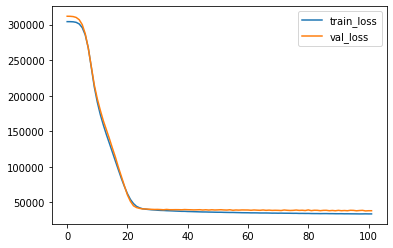

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss','val_loss'])
